In [17]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import pattrex.plotting_mpl as plt_rex

# PCA

Referred to np-sp-recipes-12 (for eigenvalues/eigenvecotrs of covariance matrices)

## Import and Preprocess data

- Import data into a `numpy` array
- **normalize** the data to zero-mean

In [3]:
data_X_fp = "./data/data-dimred-X.csv"
data_y_fp = "./data/data-dimred-y.csv"

data_X = np.genfromtxt(data_X_fp, delimiter=',')
data_y = np.genfromtxt(data_y_fp, delimiter=',')

print("data : {} \nlabels : {}".format(data_X.shape, data_y.shape))

data : (500, 150) 
labels : (150,)


In [4]:
data_y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.])

In [62]:
data_X_mean = data_X.mean(axis=1).reshape(500, 1)
data_X_norm = data_X - np.tile(data_X_mean, (1, 150))

data_X_norm.mean(axis=1).sum()

2.7529830267288461e-15

## Caculate the Covariance Matrix

In [6]:
C_X = np.cov(data_X_norm)
C_X.shape

(500, 500)

## Do Eigen Analysis

Using `numpy.linalg.eigh(...)`

(500,)
(500, 500)


<IPython.core.display.Javascript object>


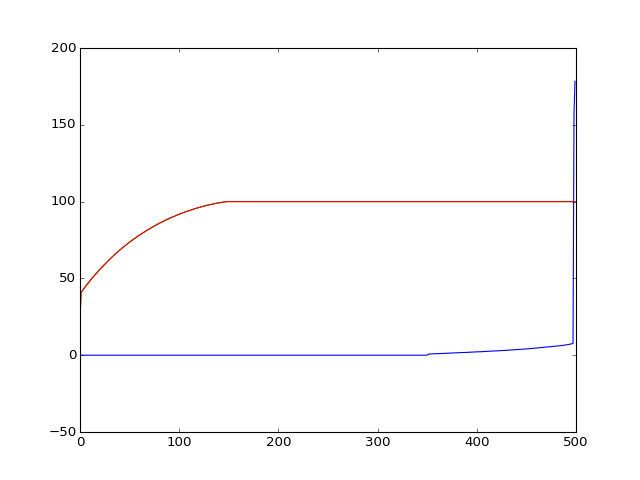

In [7]:
evals, evects = np.linalg.eigh(C_X)

print(evals.shape)
print(evects.shape)

plt.plot(np.arange(evals.size), evals)

In [9]:
dims = evals.shape[0]
print(dims)
print(evects[:, 0].shape)

for i in range(dims):
    evi = evects[:, i].reshape(dim, 1)
    print(i)
    np.testing.assert_array_almost_equal(C_X.dot(evi),
                                        evals_L[i] * evi)

500
(500,)


NameError: name 'dim' is not defined

### So, they are ascending
Let's look at the top 10

In [10]:
# sort descending
idx = np.argsort(evals)[::-1]
sorted_evals = evals[idx]
sorted_evects = evects[:, idx]

In [11]:
sorted_evals[:10]

array([ 178.36082561,  157.5026053 ,    7.76115581,    7.51579683,
          7.28021248,    7.18770618,    7.05327894,    6.87866945,
          6.8158655 ,    6.73649919])

### Let's try to find where do they sum up to 90, 95, and 99 % of the total

In [12]:
sum_s_evals = np.cumsum(sorted_evals)

def where_sum_to(X, x, side='left'):
    return np.searchsorted(X, x, side=side)

print("90%  :", where_sum_to(sum_s_evals, sum_s_evals[-1] * 0.9))
print("95%  :", where_sum_to(sum_s_evals, sum_s_evals[-1] * 0.95))
print("99%  :", where_sum_to(sum_s_evals, sum_s_evals[-1] * 0.99))
print("100% :", where_sum_to(sum_s_evals, sum_s_evals[-1] * 1.0), " First")
print("100% :", where_sum_to(sum_s_evals, sum_s_evals[-1] * 1.0, side='right'), " Last")

90%  : 94
95%  : 114
99%  : 139
100% : 148  First
100% : 500  Last


## Who Needs all of them???
Let's see how much the first two eigvals contribute

In [15]:
contrib = lambda i : 100 * sum_s_evals[i-1] / sum_s_evals[-1]

print("\n".join("First {} : {:.4} %".format(*p) for p in [(i, contrib(i)) for i in [1, 2, 3, 4, 5]]))

First 1 : 21.61 %
First 2 : 40.69 %
First 3 : 41.63 %
First 4 : 42.54 %
First 5 : 43.42 %


In [16]:
plt.plot([contrib(i + 1) for i in range(sum_s_evals.size)])

## Back to the task

- Choose the eigvecs corresponding to the first two (highest) eigvals
- Project the **normalized** data into $\mathbb{R}^2$
- Plot

In [18]:
eigval_2 = sorted_evals[:2]
eigvec_2 = sorted_evects[:, :2]

print(eigval_2)
print(eigvec_2.shape)

[ 178.36082561  157.5026053 ]
(500, 2)


In [28]:
projection = np.dot(data_X_norm.T, eigvec_2)

projection.shape

(150, 2)

In [29]:
proj = (data_X_norm.T).dot(eigvec_2)
proj.shape
np.allclose(proj, projection)

True

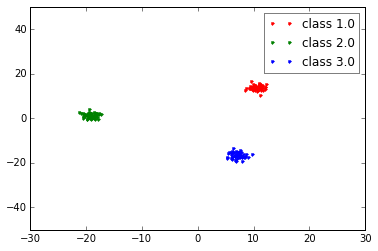

In [30]:
fig = plt.figure()
axs = fig.add_subplot(111)

for l, c in zip([1., 2., 3.], ['r.', 'g.', 'b.']):
    plt_rex.plot2d(proj[np.where(data_y == l)], False, axs=axs,
                  x_lim=[-30, 30], y_lim=[-50, 50], hatch=c, show=False,
                  plotlabel="class " + str(l))

### WooHoo

# Multiclass LDA

## Split the data based on class first

In [31]:
datas = {c : {"data" : np.copy(data_X[:, np.where(data_y == c)[0]])}
         for c in np.unique(data_y)}

In [32]:
print("\n".join("Class {} : dim {}, # {}".format(k, *v["data"].shape) 
                for k, v in datas.items()))

Class 1.0 : dim 500, # 50
Class 2.0 : dim 500, # 50
Class 3.0 : dim 500, # 50


## Calculate $S_W$, $S_B$

In [50]:
ddof = 0
for k, v in datas.items():
    datas[k]["mean"] = np.mean(v["data"], axis=1)
    datas[k]["cov"] = np.cov(v["data"], ddof=ddof)
    datas[k]["n"] = v["data"].shape[1]

datas[1.0]["n"]

50

In [37]:
S_w = sum([v["cov"] for v in datas.values()])
S_w.shape

(500, 500)

In [38]:
S_w

array([[ 2.64226592,  0.05964072,  0.13245129, ..., -0.07454655,
         0.10658646,  0.21943141],
       [ 0.05964072,  2.59807722,  0.30960404, ..., -0.30325111,
        -0.01767206,  0.33158715],
       [ 0.13245129,  0.30960404,  2.42670612, ..., -0.16493629,
         0.05950132, -0.25134297],
       ..., 
       [-0.07454655, -0.30325111, -0.16493629, ...,  2.52283261,
        -0.20351744,  0.06395171],
       [ 0.10658646, -0.01767206,  0.05950132, ..., -0.20351744,
         2.35337052, -0.26151295],
       [ 0.21943141,  0.33158715, -0.25134297, ...,  0.06395171,
        -0.26151295,  3.0461771 ]])

In [39]:
data_mean = np.mean(data_X, axis=1)
data_mean.shape

(500,)

In [187]:
np.allclose(data_mean - (1/150) * sum([50 * datas[c]["mean"] for c in datas.keys()]),
           np.zeros(500))

True

In [188]:
np.allclose(np.mean(np.vstack([datas[k]["mean"] for k in datas.keys()]), axis=0) - data_mean, np.zeros(500))

True

In [51]:
S_b = np.zeros(S_w.shape)
S_b_ = np.copy(S_b)
for v in datas.values():
    mean_diff = v["mean"] - data_mean
    mean_diff = mean_diff.reshape(mean_diff.shape[0], 1)
    S_b += mean_diff.dot(mean_diff.T)  # / v["n"]
    S_b_ += (mean_diff.T).dot(mean_diff)  # / v["n"]
    
S_b_.shape

(500, 500)

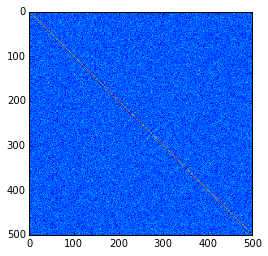

In [55]:
plt.imshow(S_w)

In [44]:
S_b

array([[ 0.93543578, -0.44788511,  0.78986801, ..., -0.04218842,
        -0.59572786, -0.63122948],
       [-0.44788511,  0.58831816,  0.66509926, ..., -0.5465611 ,
         0.44665201, -0.09044027],
       [ 0.78986801,  0.66509926,  3.57823978, ..., -1.61716687,
        -0.05258614, -1.62874994],
       ..., 
       [-0.04218842, -0.5465611 , -1.61716687, ...,  0.86106916,
        -0.21783069,  0.62372946],
       [-0.59572786,  0.44665201, -0.05258614, ..., -0.21783069,
         0.44907867,  0.23245997],
       [-0.63122948, -0.09044027, -1.62874994, ...,  0.62372946,
         0.23245997,  0.8383696 ]])

In [48]:
S_t = np.cov(data_X, ddof=0)
np.testing.assert_array_almost_equal(S_b + S_w, S_w)

AssertionError: 
Arrays are not almost equal to 6 decimals

(mismatch 99.9992%)
 x: array([[ 3.577702, -0.388244,  0.922319, ..., -0.116735, -0.489141,
        -0.411798],
       [-0.388244,  3.186395,  0.974703, ..., -0.849812,  0.42898 ,...
 y: array([[ 2.642266,  0.059641,  0.132451, ..., -0.074547,  0.106586,
         0.219431],
       [ 0.059641,  2.598077,  0.309604, ..., -0.303251, -0.017672,...

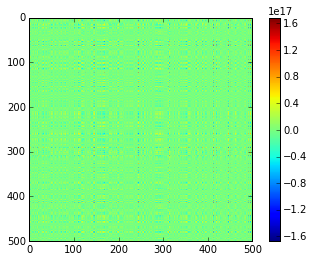

In [56]:
W = np.linalg.inv(S_w).dot(S_b)

plt.imshow(W)
plt.colorbar()

In [47]:
evals_L, evects_L = np.linalg.eigh(np.linalg.inv(S_w).dot(S_b))

print(evals_L.shape, evects_L.shape)

(500,) (500, 500)


In [257]:
dims = evals_L.shape[0]

for i in range(dims):
    evi = evects_L[:, i].reshape(dim, 1)
    print(i)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_w).dot(S_b).dot(evi),
                                        evals_L[i] * evi)

0


AssertionError: 
Arrays are not almost equal to 6 decimals

(mismatch 100.0%)
 x: array([[  7.175487e+17],
       [  1.562347e+16],
       [ -8.034747e+17],...
 y: array([[  2.681538e+17],
       [  7.818091e+16],
       [  7.985324e+17],...

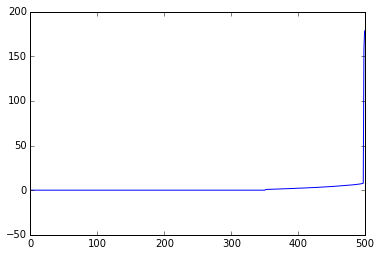

In [58]:
plt.plot(evals)

In [259]:
# sort descending
idx_L = np.argsort(evals_L)[::-1]
sorted_evals_L = evals_L[idx]
sorted_evects_L = evects_L[:, idx]

eigval_L_2 = sorted_evals_L[:2]
eigvec_L_2 = sorted_evects_L[:, :2]

print(eigval_L_2)
print(eigvec_L_2.shape)

[  9.76172857e+18   3.23052522e+18]
(500, 2)


In [260]:
projection_L = (data_X.T).dot(eigvec_L_2)

projection_L.shape

(150, 2)

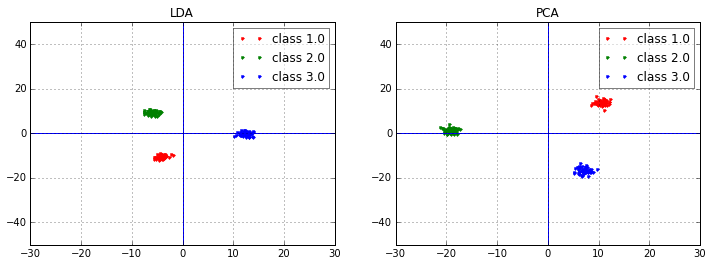

In [267]:
fig = plt.figure(figsize=(12, 4))
axs1 = fig.add_subplot(121)
axs2 = fig.add_subplot(122)

for l, c in zip([1., 2., 3.], ['r.', 'g.', 'b.']):
    plt_rex.plot2d(projection_L[np.where(data_y == l)], False, axs=axs1,
                  x_lim=[-30, 30], y_lim=[-50, 50], hatch=c, show=False,
                  plotlabel="class " + str(l), title="LDA")
    plt_rex.plot2d(projection[np.where(data_y == l)], False, axs=axs2,
                  x_lim=[-30, 30], y_lim=[-50, 50], hatch=c, show=False,
                  plotlabel="class " + str(l), title="PCA")
    
axs1.grid()
axs1.axvline(x=0)
axs1.axhline(y=0)

axs2.grid()
axs2.axvline(x=0)
axs2.axhline(y=0)

In [264]:
plt_rex.plot2d??

# In $\mathbb{R}^3$

In [268]:
eigval_L_3 = sorted_evals_L[:3]
eigvec_L_3 = sorted_evects_L[:, :3]

print(eigval_L_3)
print(eigvec_L_3.shape)

projection_L_3 = (data_X.T).dot(eigvec_L_3)

projection_L_3.shape

[  9.76172857e+18   3.23052522e+18   3.10432128e+18]
(500, 3)


(150, 3)

In [269]:
eigval_3 = sorted_evals[:3]
eigvec_3 = sorted_evects[:, :3]

print(eigval_3)
print(eigvec_3.shape)

projection_3 = (data_X.T).dot(eigvec_3)

projection_3.shape

[ 178.36082561  157.5026053     7.76115581]
(500, 3)


(150, 3)

<IPython.core.display.Javascript object>


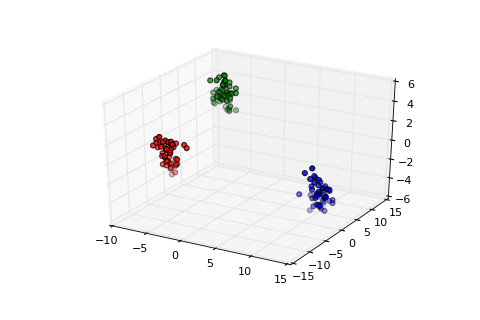

In [290]:
fig1 = plt.figure()
axs1 = plt.axes(projection='3d')


for l, c in zip([1., 2., 3.], ['r', 'g', 'b']):
    d_L = projection_L_3[np.where(data_y == l)]
    d = projection_3[np.where(data_y == l)]
    axs1.scatter3D(d_L[:, 0], d_L[:, 1], d_L[:, 2], c=c)
    
axs1.grid()

<IPython.core.display.Javascript object>


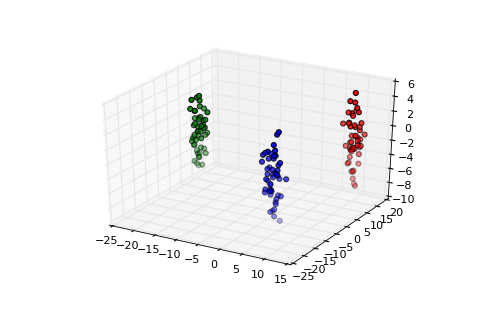

In [291]:
fig2 = plt.figure()
axs2 = plt.axes(projection='3d')

for l, c in zip([1., 2., 3.], ['r', 'g', 'b']):
    d = projection_3[np.where(data_y == l)]
    axs2.scatter3D(d[:, 0], d[:, 1], d[:, 2], c=c)

In [ ]:
fig3 = plt.figure()
axs3 = plt.axes(projection='3d')


for l, c in zip([1., 2., 3.], ['r', 'g', 'b']):
    d_L = projection_L[np.where(data_y == l)]
    d = projection_3[np.where(data_y == l)]
    axs3.scatter3D(d_L[:, 0], d_L[:, 1], d_L[:, 2], c=c)
    
axs3.grid()

# Hartigan experiment

In [451]:
X = np.copy(projection_L)
k = 3

In [452]:
np.random.seed(9000)

In [453]:
CALLED = 0
NX = 0
def sqnorm(x):
    global CALLED, NX
    CALLED += 1
    NX += len(x)
    return np.power(np.linalg.norm(x), 2)

In [454]:
def hartigan(X, k):
    nX, mX = X.shape
    y = np.random.randint(k, size=nX)
    
    m = np.zeros((k, mX))
    e = np.ones(k)
    n = np.zeros(k)
    for kk in range(k):
        Xkk = X[y == kk]
        m[kk] = np.mean(Xkk, axis=0)
        e[kk] = np.sum(sqnorm(Xkk - m[kk]))
        n[kk] = len(Xkk)
    
    converged = False
    t, t_max = 0, 10
    while not converged and t < t_max:
        t += 1 
        converged = True
        for i, x in enumerate(X):
            ki = y[i]
            y[i] = -1
            Xki = np.copy(X[y == ki])
            n[ki] = len(Xki)

            m[ki] = (n[ki] / (n[ki] - 1)) * (m[ki] - x / n[ki])

            normxki = sqnorm(x - m[ki])
            eki = e[ki]
            e[ki] = np.sum(sqnorm(Xki - m[ki])) - normxki
            ediffki =  e[ki] - eki

            ediff = []
            for kk in range(k):
                if kk == ki:
                    ediff.append(ediffki + normxki)
                else:
                    ediff.append(ediffki + sqnorm(x - m[kk]))

            kw = np.argmin(ediff)

            converged = ki == kw

            y[i] = kw
            Xkw = np.copy(X[y == kw])
            n[kw] = len(Xkw)
            m[kw] += (1/n[kw]) * (x - m[kw])
            e[kw] = np.sum(sqnorm(Xkw - m[kw]))

        if converged:
            print(t)

    return y

In [455]:
y_ = hartigan(X, k)

2


In [448]:
y_[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

<IPython.core.display.Javascript object>


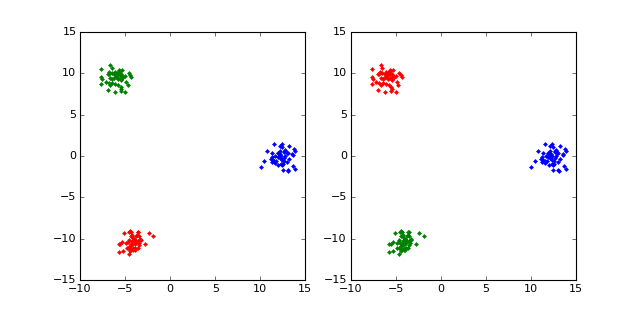

In [449]:
fig = plt.figure(figsize=(8, 4))
axs1 = fig.add_subplot(121)
axs2 = fig.add_subplot(122)

for l, c in zip([1., 2., 3.], ['r.', 'g.', 'b.']):
    plt_rex.plot2d(projection_L[np.where(data_y == l)], False, axs=axs1,
                hatch=c, show=False)
    plt_rex.plot2d(X[y_==int(l - 1)], False, axs=axs2, hatch=c, show=False)

In [456]:
print(CALLED)
print(NX)

1503
31973
